In [ ]:
import pandas as pd
import numpy as np
import zipfile
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [14]:
zip_path = "D:/Security-IA/csv/MachineLearningCVE.zip"

extract_to = "D:/Security-IA/data/raw"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

data_dir = extract_to  

csv_files = glob.glob(os.path.join(data_dir, "**", "*.csv"), recursive= True)

print(f"Arquivos encontrados: {len(csv_files)}")
if not csv_files:
    print("Nenhum arquivo CSV encontrado!")

# Armazena os DataFrames
dataframes = []

for file in csv_files:
    df_temp = pd.read_csv(file)
    print(f"{os.path.basename(file)} -> {df_temp.shape[0]:,} linhas, {df_temp.shape[1]} colunas")
    dataframes.append(df_temp)

# Junta todos os DataFrames em um só
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)
    print(f"\nDataset final: {df.shape[0]:,} linhas e {df.shape[1]} colunas")
else:
    print("Nenhum dataframe para concatenar.")

Arquivos encontrados: 8
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv -> 225,745 linhas, 79 colunas
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv -> 286,467 linhas, 79 colunas
Friday-WorkingHours-Morning.pcap_ISCX.csv -> 191,033 linhas, 79 colunas
Monday-WorkingHours.pcap_ISCX.csv -> 529,918 linhas, 79 colunas
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv -> 288,602 linhas, 79 colunas
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv -> 170,366 linhas, 79 colunas
Tuesday-WorkingHours.pcap_ISCX.csv -> 445,909 linhas, 79 colunas
Wednesday-workingHours.pcap_ISCX.csv -> 692,703 linhas, 79 colunas

Dataset final: 2,830,743 linhas e 79 colunas


In [15]:
print("\nTipos de dados das primeiras 10 colunas:")
print(df.dtypes[:10])

print(f"\nTotal de valores nulos: {df.isnull().sum().sum():,}")

print(f"Valores infinitos: {(df == np.inf).sum().sum():,}")


Tipos de dados das primeiras 10 colunas:
 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
dtype: object

Total de valores nulos: 1,358
Valores infinitos: 4,376


In [16]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

linhas_antes = df.shape[0]
df.dropna(inplace=True)
linhas_depois = df.shape[0]

print(f"Linhas removidas por valores nulos/infinitos: {linhas_antes - linhas_depois:,}")

Linhas removidas por valores nulos/infinitos: 2,867


In [17]:
# Remover espaços extras no início e no fim dos nomes das colunas
df.columns = df.columns.str.strip()

print("Colunas normalizadas:")
print(df.columns.tolist())


colunas_remover = [
    "Destination Port", "Fwd Header Length.1", "Init_Win_bytes_forward",
    "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward",
    "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets",
    "Subflow Bwd Bytes", "Average Packet Size"
]

df = df.drop(columns=colunas_remover, errors="ignore")

print(f"Total de colunas agora: {len(df.columns)}")
print(df.columns.tolist())


Colunas normalizadas:
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag C

Colunas: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up

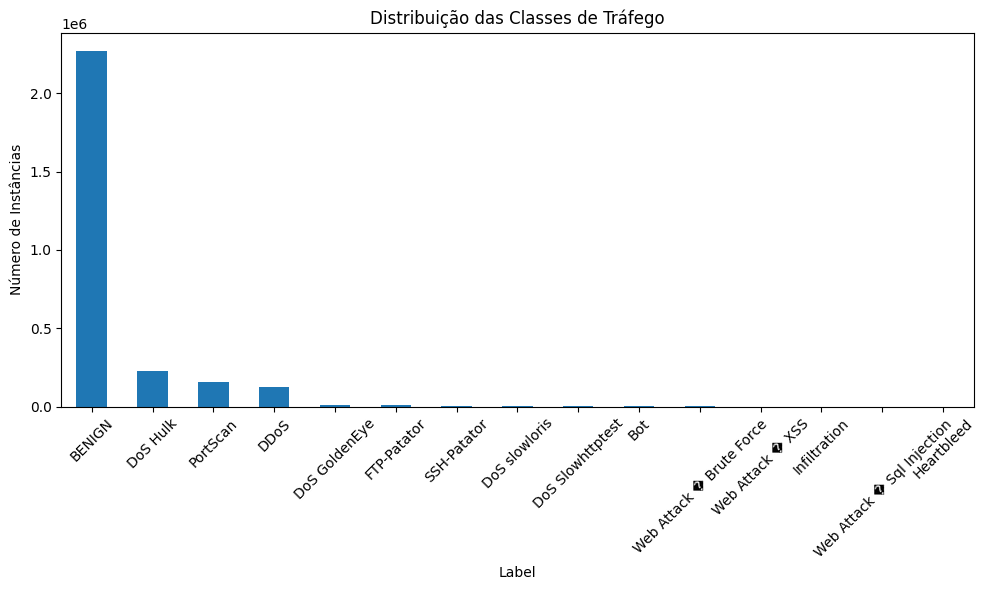

In [19]:
df.columns = df.columns.str.strip()

# Confirma que existe a coluna Label
print("Colunas:", df.columns.tolist())

print("\nDistribuição das classes (Label):")
print(df['Label'].value_counts())

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Label'].value_counts().plot(kind='bar')
plt.title("Distribuição das Classes de Tráfego")
plt.ylabel("Número de Instâncias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Codificar rótulos categóricos para números
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# Mostrar mapeamento
print("Mapeamento de classes:")
for i, classe in enumerate(le.classes_):
    print(f"{i} -> {classe}")

Mapeamento de classes:
0 -> BENIGN
1 -> Bot
2 -> DDoS
3 -> DoS GoldenEye
4 -> DoS Hulk
5 -> DoS Slowhttptest
6 -> DoS slowloris
7 -> FTP-Patator
8 -> Heartbleed
9 -> Infiltration
10 -> PortScan
11 -> SSH-Patator
12 -> Web Attack � Brute Force
13 -> Web Attack � Sql Injection
14 -> Web Attack � XSS


In [21]:
X = df.drop('Label', axis=1)  # todas as colunas, exceto o rótulo
y = df['Label']               # só a coluna Label

print(f"X (features): {X.shape}")
print(f"y (rótulo): {y.shape}")

X (features): (2827876, 67)
y (rótulo): (2827876,)


In [23]:
# Verificar se há colunas categóricas (tipo 'object')
categorical_cols = X.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"Colunas categóricas encontradas: {list(categorical_cols)}")
    for col in categorical_cols:
        X[col] = LabelEncoder().fit_transform(X[col])
else:
    print("Nenhuma coluna categórica encontrada")

Nenhuma coluna categórica encontrada


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados normalizados com StandardScaler")
print(f"Formato: {X_scaled.shape}")

Dados normalizados com StandardScaler
Formato: (2827876, 67)


In [28]:
# 1. PRIMEIRO: Dividir os dados (ANTES de qualquer pré-processamento)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantém proporção das classes
)

print(f"Treino: {X_train.shape[0]:,} amostras")
print(f"Teste: {X_test.shape[0]:,} amostras")

# 2. CODIFICAR as labels ANTES de tudo
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # ✅ Codificar APENAS com dados de treino
y_test_encoded = le.transform(y_test)        # ✅ Aplicar mesma codificação no teste

print("Labels codificados corretamente")

# 3. DEPOIS: Aplicar scaling APENAS nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Aprende só com treino
X_test_scaled = scaler.transform(X_test)        # Aplica no teste

print("Dados normalizados SEM data leakage")

# 4. Balancear as classes (usando SMOTE) COM y CODIFICADO
from imblearn.over_sampling import SMOTE

print("Balanceando classes com SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_encoded)  # ✅ Usar y_train_encoded

print(f"Após balanceamento - Treino: {X_train_balanced.shape[0]:,} amostras")

# Verificar distribuição balanceada
unique, counts = np.unique(y_train_balanced, return_counts=True)
print("\nDistribuição após balanceamento:")
for cls, count in zip(unique, counts):
    print(f"Classe {cls}: {count:,} amostras")

# 5. Salvar os dados processados CORRETAMENTE
import os
os.makedirs("D:/Security-IA/data/processed", exist_ok=True)

np.save("D:/Security-IA/data/processed/X_train_balanced.npy", X_train_balanced)
np.save("D:/Security-IA/data/processed/X_test_scaled.npy", X_test_scaled)
np.save("D:/Security-IA/data/processed/y_train_balanced.npy", y_train_balanced)
np.save("D:/Security-IA/data/processed/y_test.npy", y_test_encoded)  

# Salvar também o LabelEncoder e Scaler para uso futuro
import joblib
joblib.dump(le, "D:/Security-IA/data/processed/label_encoder.pkl")
joblib.dump(scaler, "D:/Security-IA/data/processed/scaler.pkl")
 
print("Dados salvos com pré-processamento correto!")

Treino: 2,262,300 amostras
Teste: 565,576 amostras
Labels codificados corretamente
Dados normalizados SEM data leakage
Balanceando classes com SMOTE...
Após balanceamento - Treino: 27,255,825 amostras

Distribuição após balanceamento:
Classe 0: 1,817,055 amostras
Classe 1: 1,817,055 amostras
Classe 2: 1,817,055 amostras
Classe 3: 1,817,055 amostras
Classe 4: 1,817,055 amostras
Classe 5: 1,817,055 amostras
Classe 6: 1,817,055 amostras
Classe 7: 1,817,055 amostras
Classe 8: 1,817,055 amostras
Classe 9: 1,817,055 amostras
Classe 10: 1,817,055 amostras
Classe 11: 1,817,055 amostras
Classe 12: 1,817,055 amostras
Classe 13: 1,817,055 amostras
Classe 14: 1,817,055 amostras
Dados salvos com pré-processamento correto!
